# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Training Dataset

In [4]:
train_df=pd.read_csv('Train.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning

In [7]:
#Finding Missing Values
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#filling the missing values for numerical terms:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mean())

In [9]:
# fill the missing values for categorical terms (By using Mode)
train_df['Gender'] = train_df["Gender"].fillna(train_df['Gender'].mode()[0])
train_df['Married'] = train_df["Married"].fillna(train_df['Married'].mode()[0])
train_df['Dependents'] = train_df["Dependents"].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed'] = train_df["Self_Employed"].fillna(train_df['Self_Employed'].mode()[0])

In [10]:
#Rechecking missing terms 
train_df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Gender', ylabel='count'>

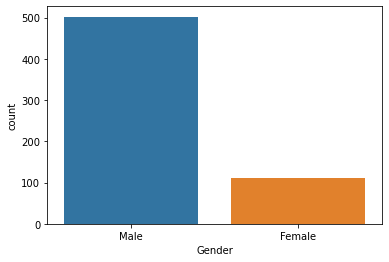

In [14]:
# categorical attributes visualization
sns.countplot(train_df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

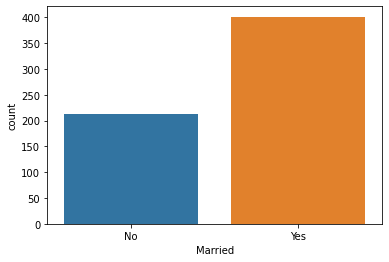

In [15]:
sns.countplot(train_df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

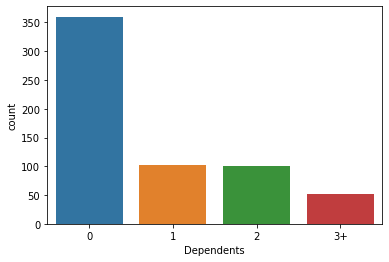

In [16]:
sns.countplot(train_df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

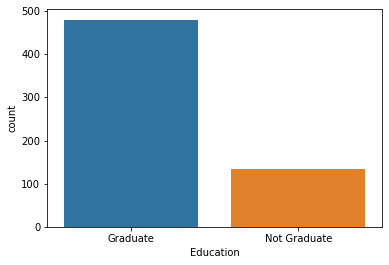

In [17]:
sns.countplot(train_df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

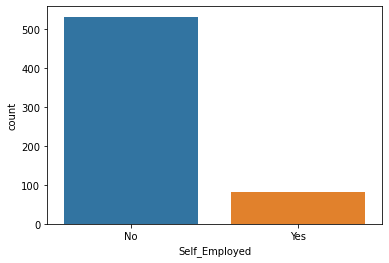

In [18]:
sns.countplot(train_df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

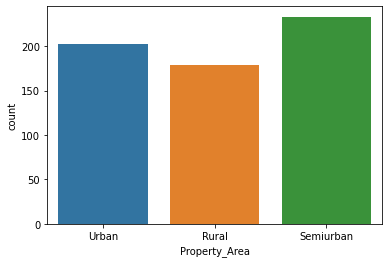

In [19]:
sns.countplot(train_df['Property_Area'])


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

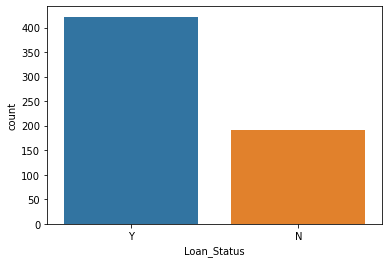

In [20]:
sns.countplot(train_df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

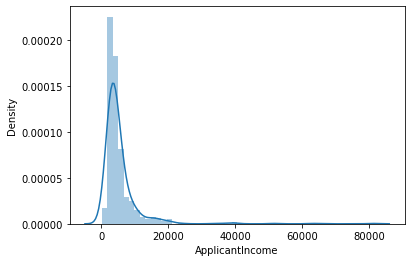

In [22]:
#Visualizing Numerical Data:
sns.distplot(train_df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

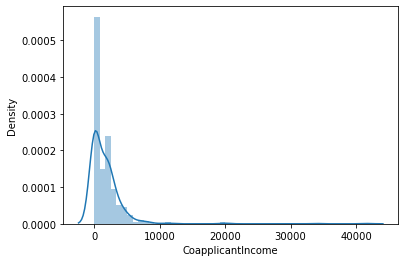

In [23]:
sns.distplot(train_df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

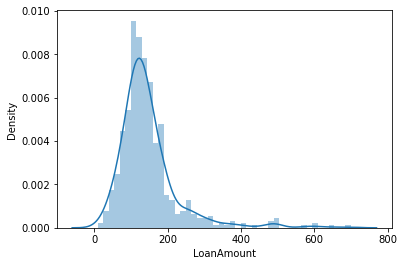

In [24]:
sns.distplot(train_df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

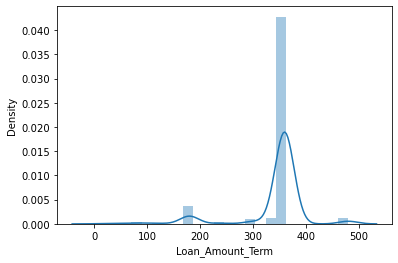

In [25]:
sns.distplot(train_df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

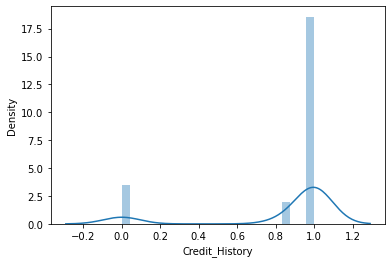

In [27]:
sns.distplot(train_df['Credit_History'])

# Creating New Attributes


In [11]:
# Total Amount of Income:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transform

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

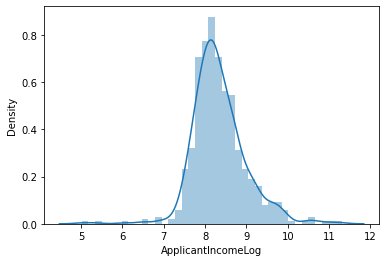

In [12]:
# Applying log transformation to the attribute
train_df['ApplicantIncomeLog'] = np.log(train_df['ApplicantIncome'])
sns.distplot(train_df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

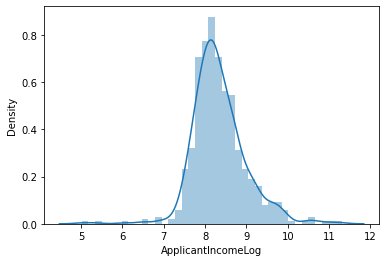

In [13]:
train_df['CoapplicantIncomeLog'] = np.log(train_df['CoapplicantIncome'])
sns.distplot(train_df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

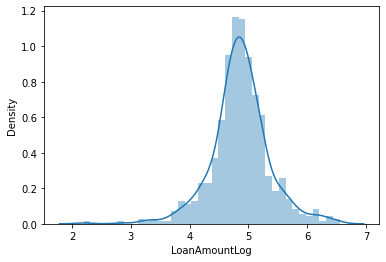

In [14]:
train_df['LoanAmountLog'] = np.log(train_df['LoanAmount'])
sns.distplot(train_df["LoanAmountLog"])


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

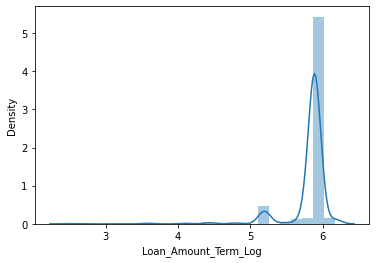

In [15]:
train_df['Loan_Amount_Term_Log'] = np.log(train_df['Loan_Amount_Term'])
sns.distplot(train_df["Loan_Amount_Term_Log"])


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

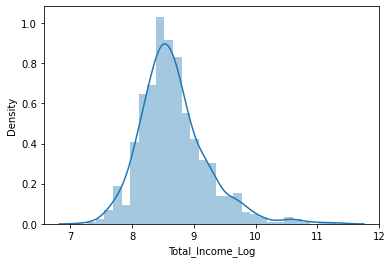

In [16]:
train_df['Total_Income_Log'] = np.log(train_df['Total_Income'])
sns.distplot(train_df["Total_Income_Log"])

# Correlation Matrix

<AxesSubplot:>

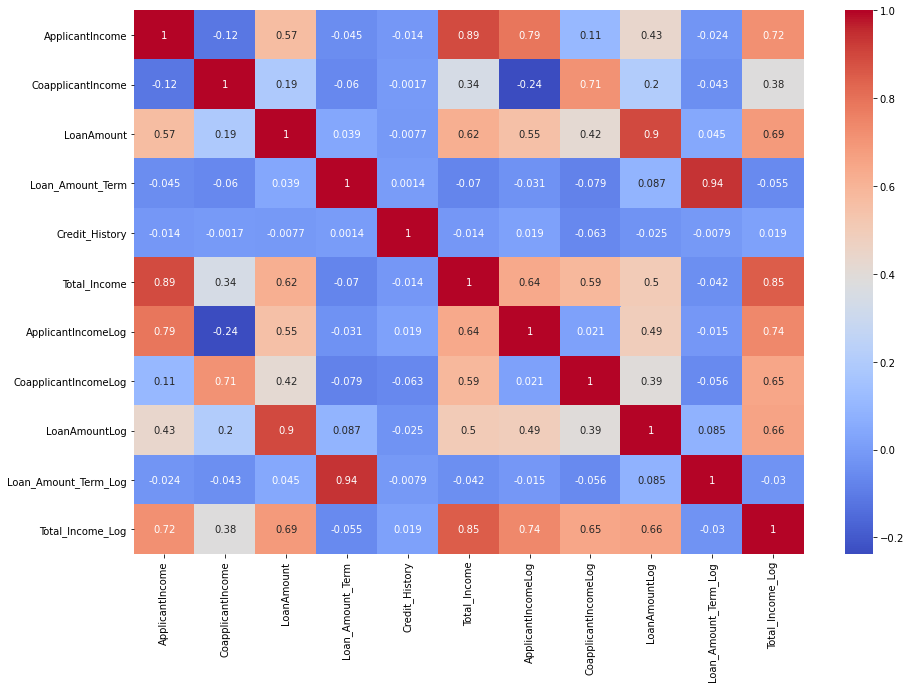

In [21]:
corr = train_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap= 'coolwarm')

In [22]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [23]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
train_df = train_df.drop(columns=cols, axis=1)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    train_df[col] = le.fit_transform(train_df[col])


In [28]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train Test Split



In [35]:
# specify input and output attributes
X = train_df.drop(columns=['Loan_Status'], axis=1)
y = train_df['Loan_Status']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model Training 

In [37]:
# classify function
from sklearn.model_selection import cross_val_score
def clas(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

# Logistic:

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clas(model, X, y)

Accuracy is 75.80645161290323
Cross validation is 80.9462881514061


# Decision Tree:


In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
clas(model, X, y)


Accuracy is 79.03225806451613
Cross validation is 70.854324936692


# SVM:


In [40]:
from sklearn.svm import SVC
model=SVC()
clas(model,X,y)

Accuracy is 77.41935483870968
Cross validation is 69.70545115287219


In [41]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7, 14],
       [ 0, 41]], dtype=int64)

<AxesSubplot:>

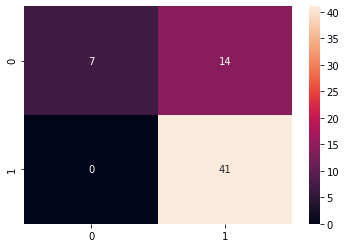

In [42]:
sns.heatmap(cm, annot=True)